In [ ]:
# Importing the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

#### **Loading the Dataset**

In [ ]:
bank_marketing = pd.read_csv("/content/bank-full.csv", sep=';')

In [ ]:
bank_marketing.shape

(45211, 17)

In [ ]:
bank_marketing.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
bank_marketing.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [ ]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank_marketing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [ ]:
bank_marketing.describe(include='object').transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


#### **Data Preprocessing**

In [ ]:
# Renaming the target variable for better clarity

bank_marketing = bank_marketing.rename(columns={'y': 'subscribed'})

In [ ]:
# Checking for missing values

bank_marketing.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [ ]:
# Fetching unique values

bank_marketing.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
# Checking for frequency

bank_marketing.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
# Fetching unique values

bank_marketing.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
# Checking for frequency

bank_marketing.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
# Fetching unique values

bank_marketing.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
# Checking for subscription counts

bank_marketing.subscribed.value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

### **Visual Exploration**

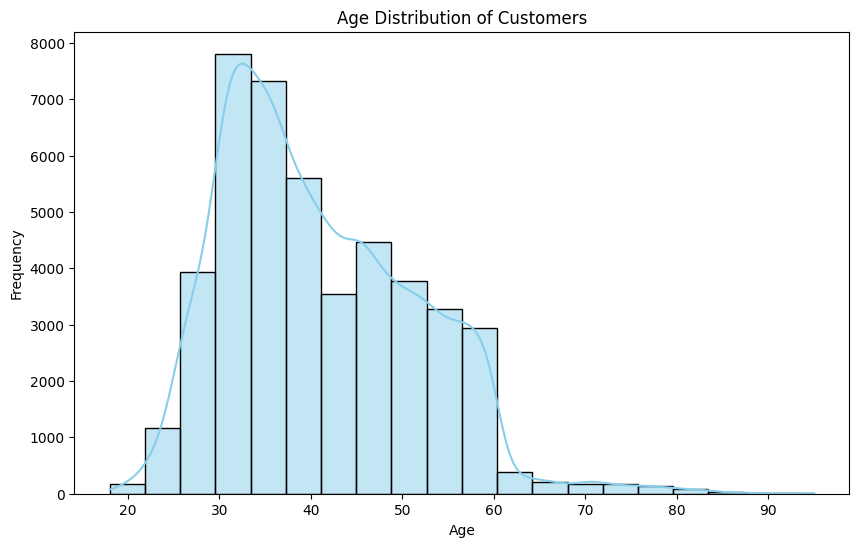

In [ ]:
# Visualizing Age Distribution

plt.figure(figsize=(10, 6))
sns.histplot(bank_marketing['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


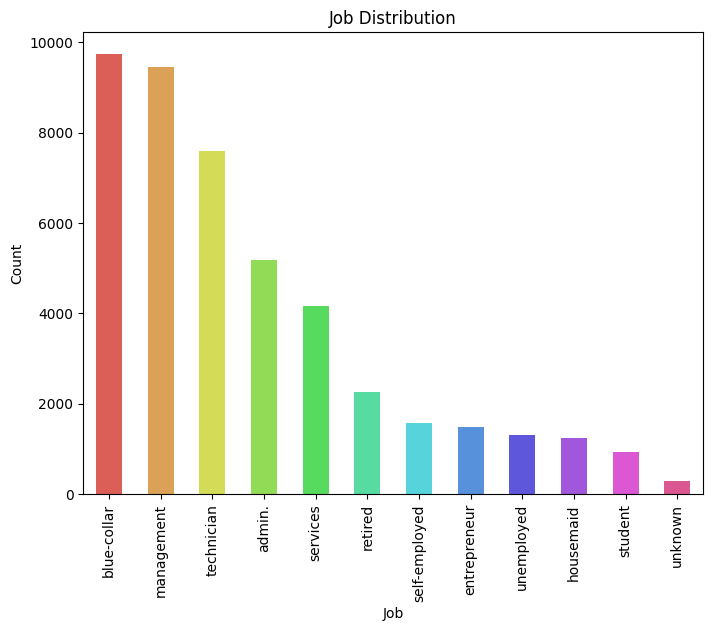

In [ ]:
# Visualizing the different types of customer jobs

plt.figure(figsize=(8, 6))

job_counts = bank_marketing['job'].value_counts()
colors = sns.color_palette('hls', len(job_counts))
job_counts.plot(kind='bar', color=colors)

plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()


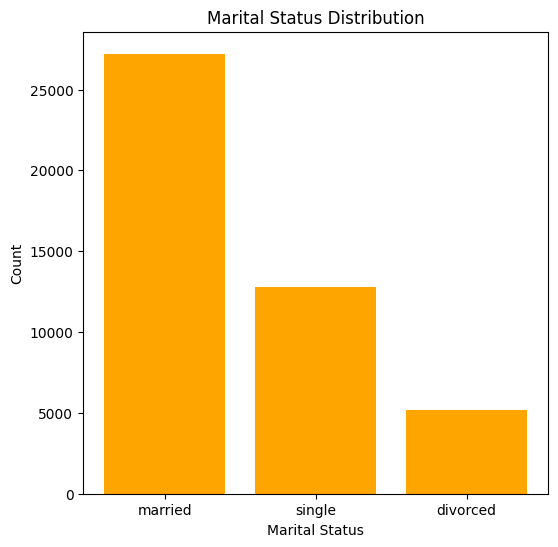

In [ ]:
# Visualizing the distribution of marital status

plt.figure(figsize=(6, 6))

marital_counts = bank_marketing['marital'].value_counts()
plt.bar(marital_counts.index, marital_counts.values, color='orange')

plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

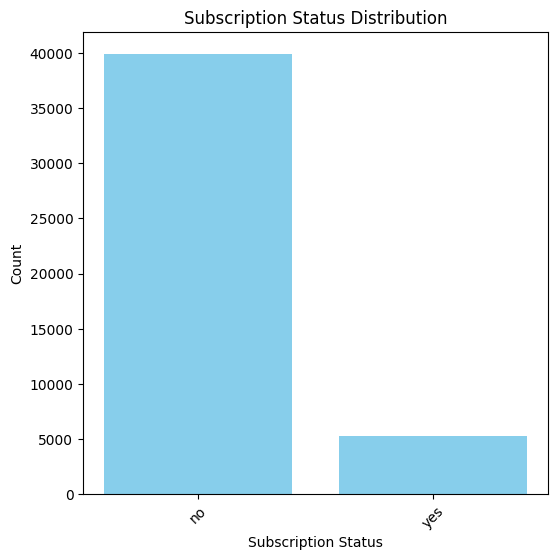

In [ ]:
# Visualizing the distribution of Subscription Status

plt.figure(figsize=(6, 6))

subscription_status = bank_marketing['subscribed'].value_counts()
plt.bar(subscription_status.index, subscription_status.values, color='skyblue')

plt.title('Subscription Status Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Exploring the distribution of jobs and corresponding subscription statuses

pd.crosstab(bank_marketing.subscribed, bank_marketing.job)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
subscribed,,,,,,,,,,,,
no,4540,9024,1364,1131,8157,1748,1392,3785,669,6757,1101,254
yes,631,708,123,109,1301,516,187,369,269,840,202,34


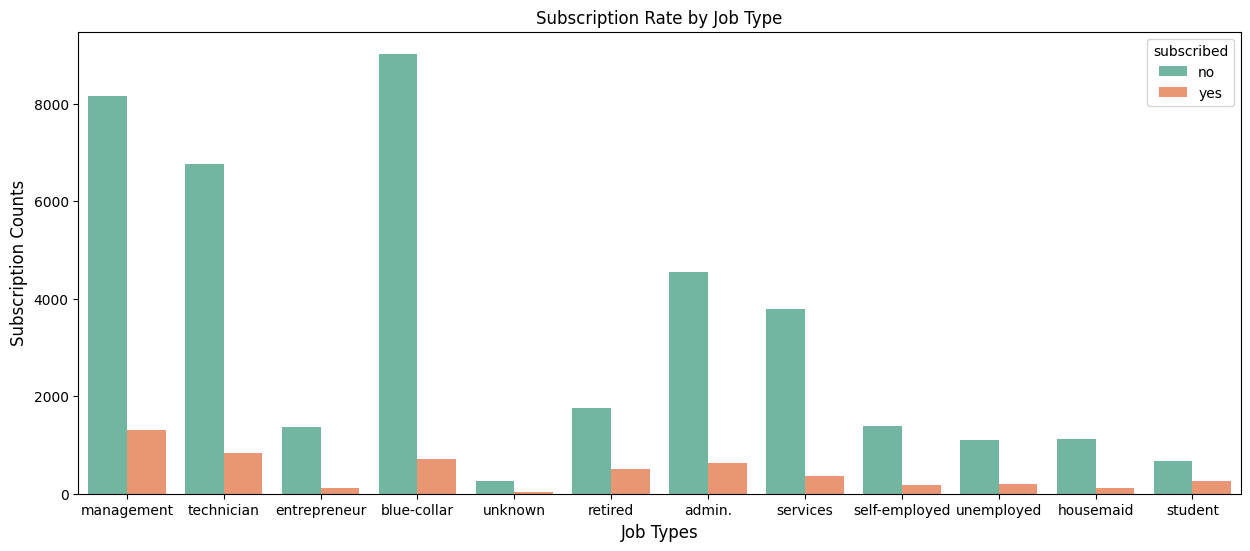

In [ ]:
# Visualizing the distribution of subscriptions based on Job Type

plt.figure(figsize=(15, 6))

sns.countplot(x='job', hue='subscribed', data=bank_marketing, palette='Set2')

plt.title('Subscription Rate by Job Type')
plt.xlabel('Job Types', fontsize=12)
plt.ylabel('Subscription Counts', fontsize=12)
plt.show()

In [ ]:
# Assuming 'bank_marketing' is your DataFrame
education_subscription_counts = bank_marketing.groupby(['education', 'subscribed']).size().unstack(fill_value=0)

print("Subscription Counts by Educational Qualification:")
print(education_subscription_counts)


Subscription Counts by Educational Qualification:
subscribed     no   yes
education              
primary      6260   591
secondary   20752  2450
tertiary    11305  1996
unknown      1605   252


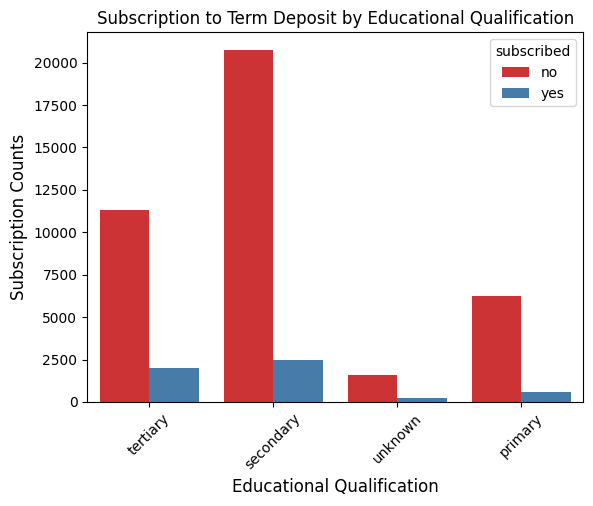

In [ ]:
# Visualzing the distribution of subscriptions based on educational status

sns.countplot(x='education', hue='subscribed', data=bank_marketing, palette='Set1')

plt.title('Subscription to Term Deposit by Educational Qualification')
plt.xlabel('Educational Qualification', fontsize=12)
plt.ylabel('Subscription Counts', fontsize=12)
plt.xticks(rotation=45)
plt.show()

<Figure size 800x600 with 0 Axes>

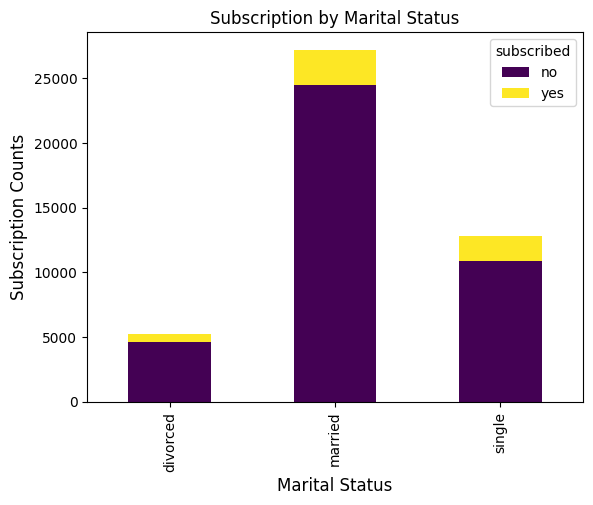

In [ ]:
# Visualzing the distribution of subscriptions based on marital status

plt.figure(figsize=(8, 6))

marital_dist = bank_marketing.groupby(['marital', 'subscribed']).size().unstack()
marital_dist.plot(kind='bar', stacked=True, colormap='viridis')

plt.title('Subscription by Marital Status')
plt.xlabel('Marital Status', fontsize=12 )
plt.ylabel('Subscription Counts', fontsize=12)
plt.show()

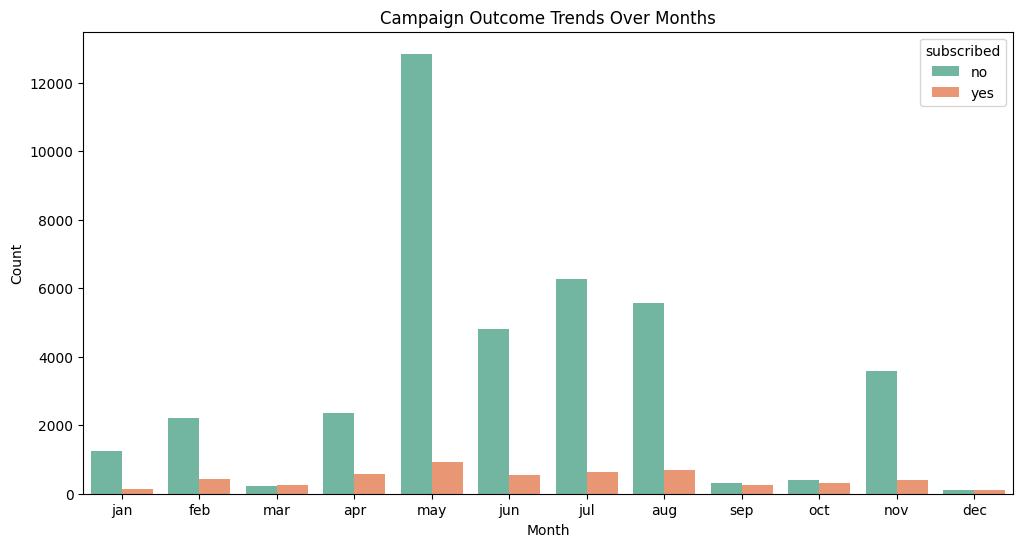

In [ ]:
# Visualizing the distribution of subscriptions for each month

month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

plt.figure(figsize=(12, 6))
sns.countplot(x='month', hue='subscribed', data=bank_marketing, order=month_order, palette='Set2')
plt.title('Campaign Outcome Trends Over Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

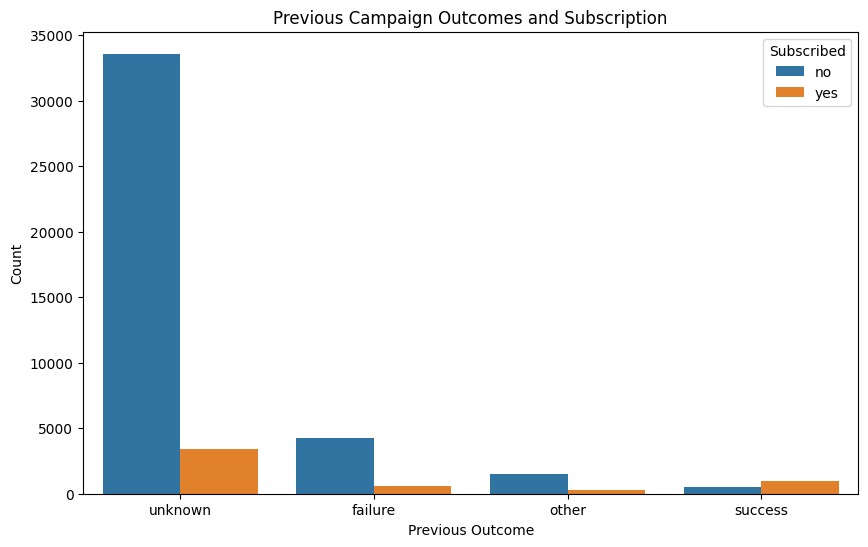

In [ ]:
# Visualizing Previous Campaign Outcomes

plt.figure(figsize=(10, 6))
sns.countplot(x='poutcome', hue='subscribed', data=bank_marketing)
plt.title('Previous Campaign Outcomes and Subscription')
plt.xlabel('Previous Outcome')
plt.ylabel('Count')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

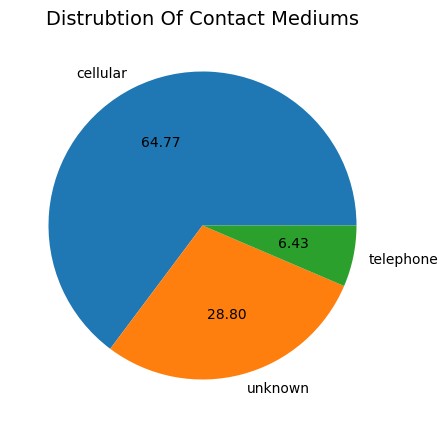

In [ ]:
# Visualizing the distribution of contact mediums used during the campaign

plt.figure(figsize=(10,5))

plt.pie(bank_marketing.contact.value_counts().values,labels=bank_marketing.contact.value_counts().index, autopct='%.2f')

plt.title('Distrubtion Of Contact Mediums',fontsize=14)
plt.show()

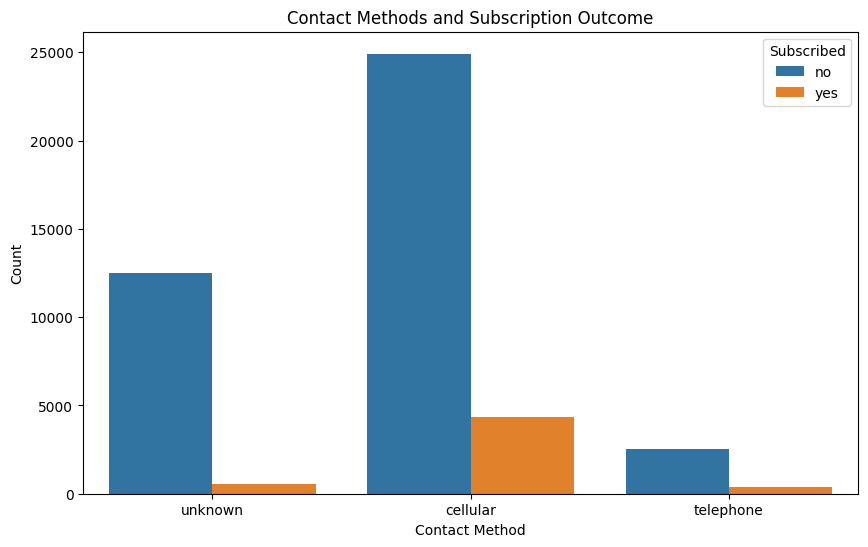

In [ ]:
  # Visualzing contact methods and subscription outcomes

  plt.figure(figsize=(10, 6))
  sns.countplot(x='contact', hue='subscribed', data=bank_marketing)
  plt.title('Contact Methods and Subscription Outcome')
  plt.xlabel('Contact Method')
  plt.ylabel('Count')
  plt.legend(title='Subscribed', loc='upper right')
  plt.show()

#### Correlation Analysis

<ipython-input-30-5458eef4c3ba>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bank_marketing.corr(), annot=True, cmap='coolwarm', fmt=".2f")


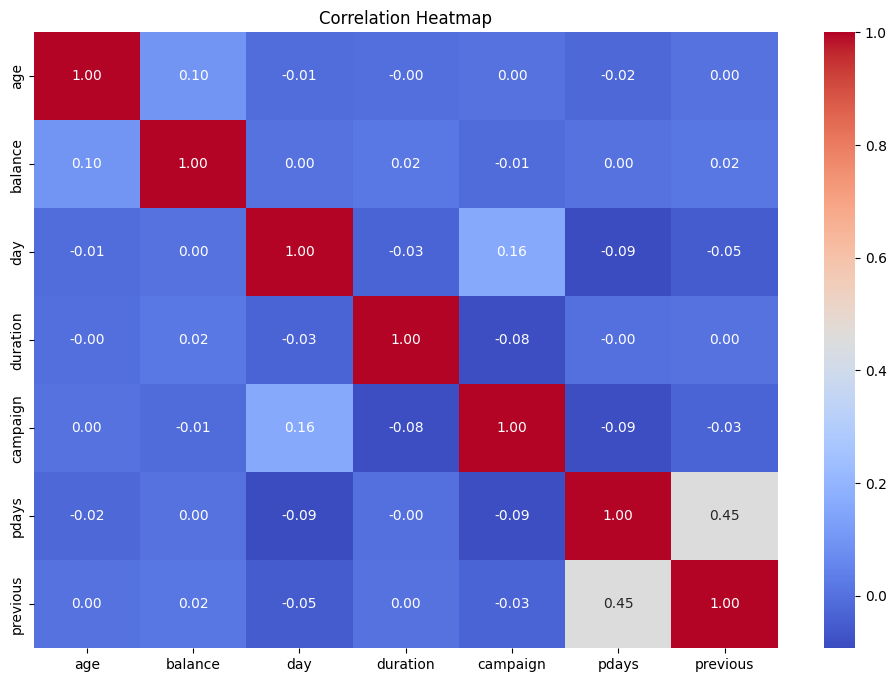

In [ ]:
# Checking for correlation between the variables

plt.figure(figsize=(12, 8))
sns.heatmap(bank_marketing.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### **Further Preprocessing**

**Encoding the categorical and target variables**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Converting some variables using Label Encoder

Label = LabelEncoder()

categorical_var = ['default', 'housing', 'loan', 'subscribed']

for i in categorical_var:
    bank_marketing[i]=Label.fit_transform(bank_marketing[i])

In [ ]:
# Converting the remaining variables using One Hot Encoding

enc = preprocessing.OneHotEncoder(drop = 'first')
onehots = enc.fit_transform(bank_marketing[['job', 'marital', 'education', 'contact', 'month', 'poutcome']]).toarray()

# Retrieving the feature names after encoding
feature_names = enc.get_feature_names_out(input_features=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

onehot_df = pd.DataFrame(onehots, columns=feature_names)
bank_marketing = pd.concat([bank_marketing, onehot_df], axis=1)

# Dropping the original columns that were encoded
bank_marketing.drop(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], axis=1, inplace = True)

In [ ]:
bank_marketing.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,0,29,1,0,5,151,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,0,2,1,1,5,76,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,0,1506,1,0,5,92,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,0,1,0,0,5,198,1,-1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


**Splitting the dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = bank_marketing.drop(columns=['subscribed'])
y = bank_marketing['subscribed']

# Splitting the data into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Standardizing the dataset**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Addressing Class Imbalance**

In [ ]:
from imblearn.over_sampling import SMOTE

# Applying SMOTE to balance the dataset

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

<Axes: xlabel='subscribed', ylabel='count'>

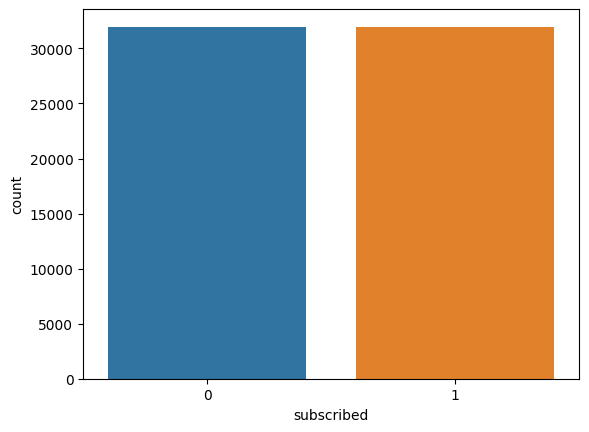

In [ ]:
sns.countplot(x=y_train_sm)

**Feature Selection and Engineering**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

# Initialising the RandomForestClassifier
rf = RandomForestClassifier(random_state=0)

rfecv = RFECV(rf, cv=3, step=5)

# Fitting the RFECV on the training data
X_train_fs = rfecv.fit_transform(X_train_sm, y_train_sm)
X_test_fs = rfecv.transform(X_test)

# Printing the number of remaining features following the selection
print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 42


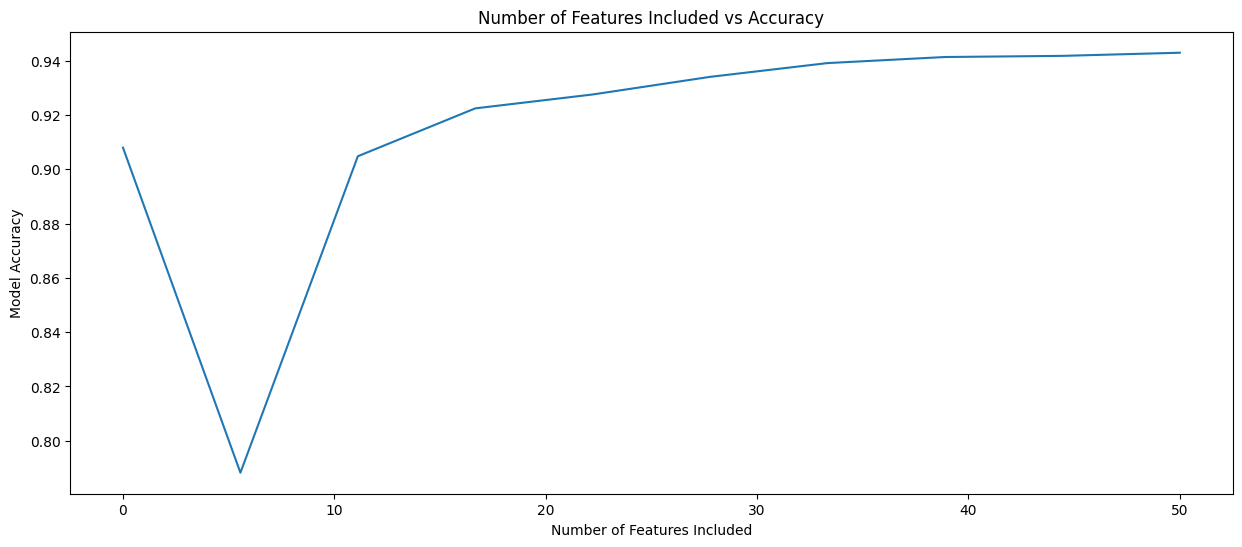

In [ ]:
# Visualizing the result of the selection

plt.figure( figsize=(15, 6))

plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(np.linspace(0,50,10), rfecv.cv_results_['mean_test_score'])
plt.show()

## **Model Development, Training and Evaluation**

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc

In [ ]:
# Creating a dictionary for storing the performance metrics of each model
model_comparison={}

#### **DECISION TREE**

In [ ]:
# Initializing the Decision Tree model
dtModel = DecisionTreeClassifier(random_state=42)

# Fitting the model on the training data
dtModel.fit(X_train_fs, y_train_sm)

# Running predictions on the test set
dtPred = dtModel.predict(X_test_fs)


Accuracy Score: 86.08%


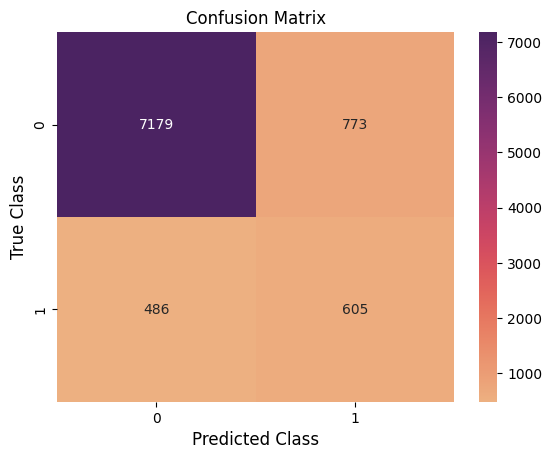

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7952
           1       0.44      0.55      0.49      1091

    accuracy                           0.86      9043
   macro avg       0.69      0.73      0.70      9043
weighted avg       0.88      0.86      0.87      9043



In [ ]:
# Generating the confusion matrix heatmap
print(f"Accuracy Score: {accuracy_score(y_test,dtPred)*100:.2f}%")

cm = confusion_matrix(y_test,dtPred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()


# Generating the classification report
print("Classification Report:")
print(classification_report(y_test, dtPred))

# Updating the model comparison dictionary with this model's performance
model_comparison['Decision Tree']=[accuracy_score(dtPred,y_test),f1_score(dtPred,y_test,average='weighted'),
                                   precision_score(y_test, dtPred),recall_score(y_test, dtPred)]



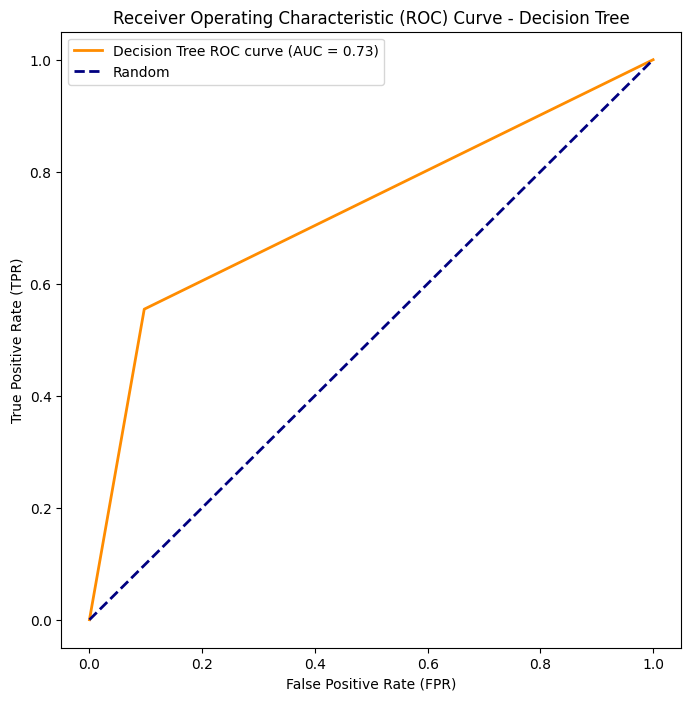

In [ ]:
# Predicting the probabilities of the positive class
dtROC = dtModel.predict_proba(X_test_fs)[:, 1]

# Computing the ROC curve
dtFPR, dtTPR, dtThresholds = roc_curve(y_test, dtROC)

# Calculating the Area Under the Curve (AUC)
dtAUC = auc(dtFPR, dtTPR)

# Plotting the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(dtFPR, dtTPR, color='darkorange', lw=2, label=f'Decision Tree ROC curve (AUC = {dtAUC:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

##### **Hyperparemeter tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Defining a parameter grid
param_grid = {'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Creating a grid search
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy')

grid_search.fit(X_train_fs, y_train_sm)

# Retrieving the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:

# Creating a new model with the best hyperparameters

tunedDtModel = DecisionTreeClassifier(
    max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42)

tunedDtModel.fit(X_train_fs, y_train_sm)

dtPred2 = tunedDtModel.predict(X_test_fs)

Accuracy Score: 86.39%


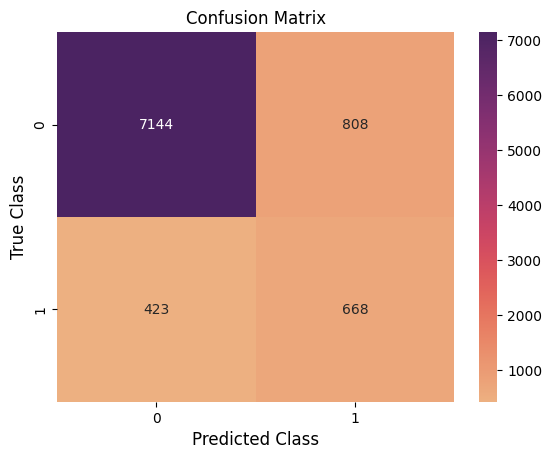

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7952
           1       0.45      0.61      0.52      1091

    accuracy                           0.86      9043
   macro avg       0.70      0.76      0.72      9043
weighted avg       0.88      0.86      0.87      9043



In [ ]:

# Generating the confusion matrix heatmap

print(f"Accuracy Score: {accuracy_score(y_test,dtPred2)*100:.2f}%")

cm = confusion_matrix(y_test,dtPred2)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

# Generating the classification report
print("Classification Report:")
print(classification_report(y_test, dtPred2))

# Updating the model comparison dictionary with this model's performance
model_comparison['Decision Tree']=[accuracy_score(dtPred2,y_test),f1_score(dtPred2,y_test,average='weighted'),
                                   precision_score(y_test, dtPred2),recall_score(y_test, dtPred2)]


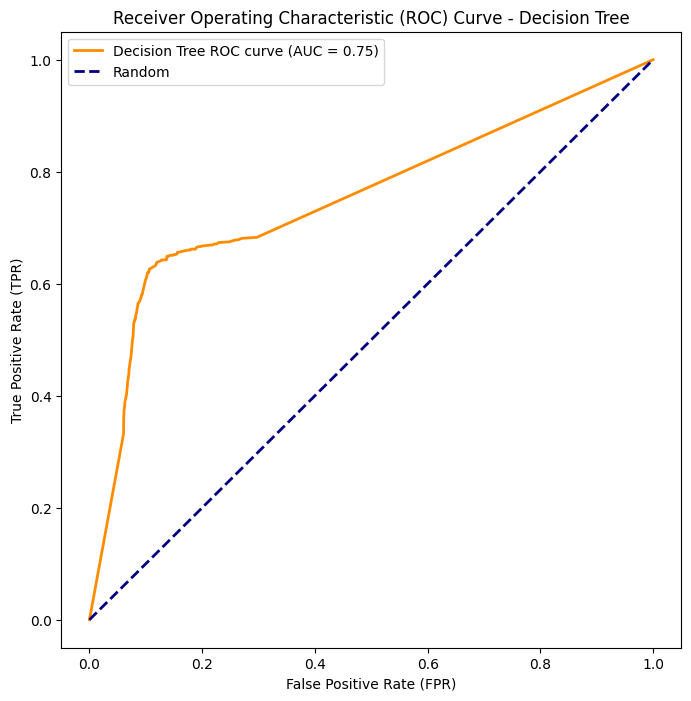

In [ ]:
# Plotting the ROC curve

dtROC2 = tunedDtModel.predict_proba(X_test_fs)[:, 1]

dtFPR, dtTPR, dtThresholds = roc_curve(y_test, dtROC2)

dtAUC = auc(dtFPR, dtTPR)

plt.figure(figsize=(8, 8))
plt.plot(dtFPR, dtTPR, color='darkorange', lw=2, label=f'Decision Tree ROC curve (AUC = {dtAUC:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree')
plt.legend()
plt.show()

#### **LOGISTIC REGRESSION**

In [ ]:
# Initializing the Logistic Regression model
logModel = LogisticRegression()

# Training the Logistic Regression model
logModel.fit(X_train_fs, y_train_sm)

# Making predictions on the test set
logPred = logModel.predict(X_test_fs)


Accuracy Score: 84.41%


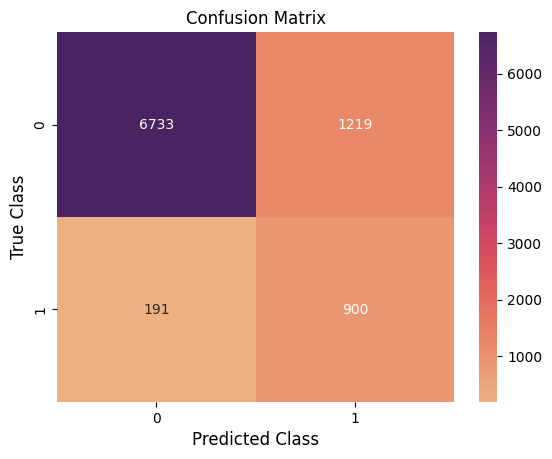

Classification Report for the Logistic Model:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7952
           1       0.42      0.82      0.56      1091

    accuracy                           0.84      9043
   macro avg       0.70      0.84      0.73      9043
weighted avg       0.91      0.84      0.86      9043



In [ ]:
# Generating the confusion matrix heatmap

print(f"Accuracy Score: {accuracy_score(y_test,logPred)*100:.2f}%")

cm = confusion_matrix(y_test,logPred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()


# Generating the classification report
print("Classification Report for the Logistic Model:")
print(classification_report(y_test, logPred))

# Updating the model comparison dictionary
model_comparison['Logistic Regression']=[accuracy_score(logPred,y_test),f1_score(logPred,y_test,average='weighted'),
                                   precision_score(y_test, logPred),recall_score(y_test, logPred)]


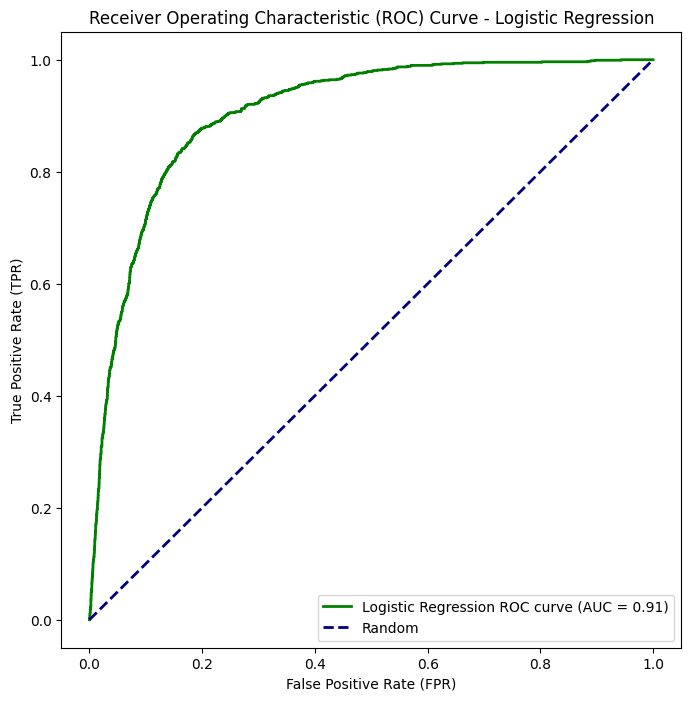

In [ ]:
# Plotting the ROC curve for Logistic Regression

logROC = logModel.predict_proba(X_test_fs)[:, 1]

logFPR, logTPR, logThresholds = roc_curve(y_test, logROC)

logAUC = auc(logFPR, logTPR)

plt.figure(figsize=(8, 8))
plt.plot(logFPR, logTPR, color='green', lw=2, label=f'Logistic Regression ROC curve (AUC = {logAUC:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend()
plt.show()

### ENSEMBLE LEARNING

#### **RANDOM FOREST**

In [ ]:
# Initializing the Random Forest model
rfModel = RandomForestClassifier(n_estimators=10)

# Fitting the model on the training data
rfModel.fit(X_train_fs, y_train_sm)

# Running predictions on the test set
rfPred = rfModel.predict(X_test_fs)


Accuracy Score: 89.28%


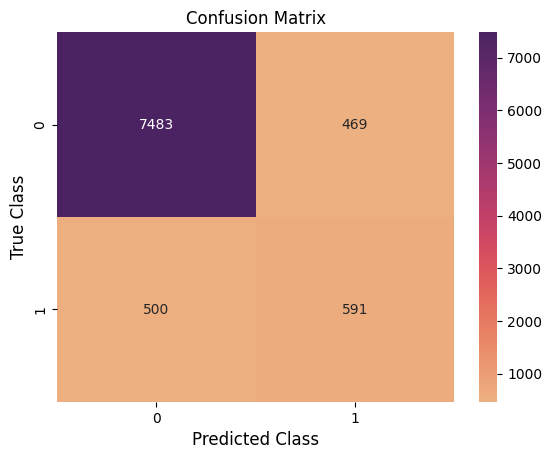

Classification Report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7952
           1       0.56      0.54      0.55      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.74      0.74      9043
weighted avg       0.89      0.89      0.89      9043



In [ ]:
# Generating the confusion matrix heatmap

print(f"Accuracy Score: {accuracy_score(y_test,rfPred)*100:.2f}%")

cm = confusion_matrix(y_test,rfPred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()


# Generating the classification report
print("Classification Report for Random Forest Model:")
print(classification_report(y_test, rfPred))

# Updating the model comparison dictionary
model_comparison['Random Forest']=[accuracy_score(rfPred,y_test),f1_score(rfPred,y_test,average='weighted'),
                                   precision_score(y_test, rfPred),recall_score(y_test, rfPred)]


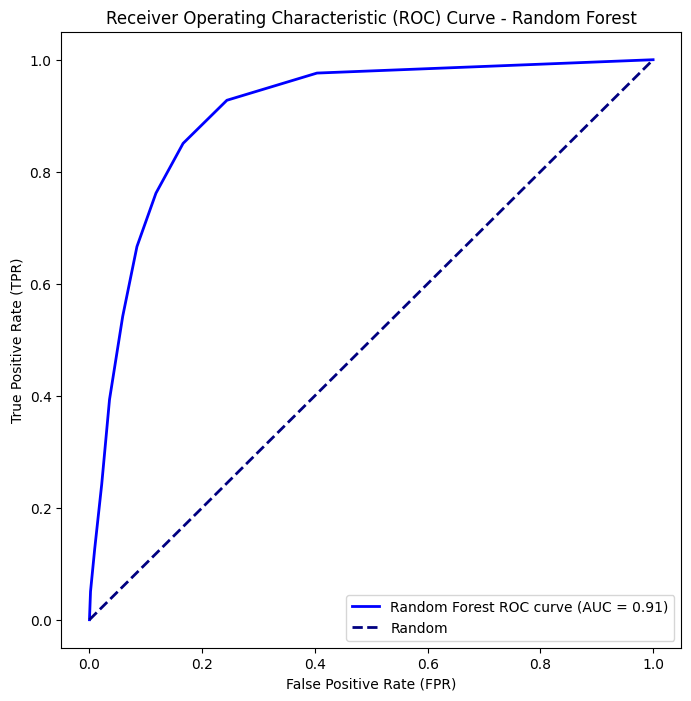

In [ ]:
# Plotting the ROC curve for Random Forest

rfROC = rfModel.predict_proba(X_test_fs)[:, 1]

rfFPR, rfTPR, rfThresholds = roc_curve(y_test, rfROC)

rfAUC = auc(rfFPR, rfTPR)

plt.figure(figsize=(8, 8))
plt.plot(rfFPR, rfTPR, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {rfAUC:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend()
plt.show()


#### **XG BOOST**

In [ ]:
# Initializing the XGBoost Classifier
xgbModel = XGBClassifier(random_state=42)

# Training the model
xgbModel.fit(X_train_fs, y_train_sm)

# Making predictions on the test set
xgbPred = xgbModel.predict(X_test_fs)

Accuracy Score: 90.36%


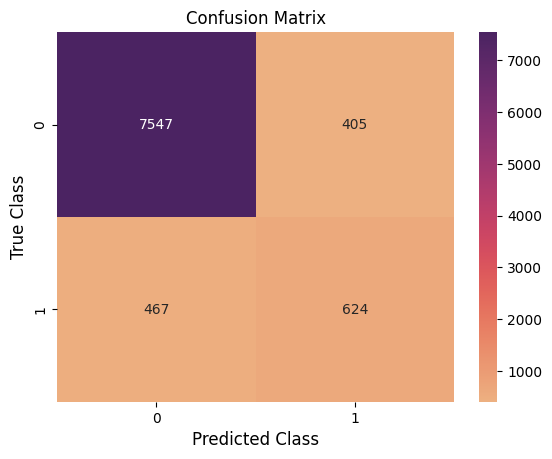

Classification Report for XG Boost Model:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7952
           1       0.61      0.57      0.59      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.76      0.77      9043
weighted avg       0.90      0.90      0.90      9043



In [ ]:
# Generating the confusion matrix heatmap

print(f"Accuracy Score: {accuracy_score(y_test,xgbPred)*100:.2f}%")

cm = confusion_matrix(y_test,xgbPred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()



# Generating the classification report
print("Classification Report for XG Boost Model:")
print(classification_report(y_test, xgbPred))

# Updating the model comparison dictionary
model_comparison['XGBoost']=[accuracy_score(xgbPred,y_test),f1_score(xgbPred,y_test,average='weighted'),
                                   precision_score(y_test, xgbPred),recall_score(y_test, xgbPred)]

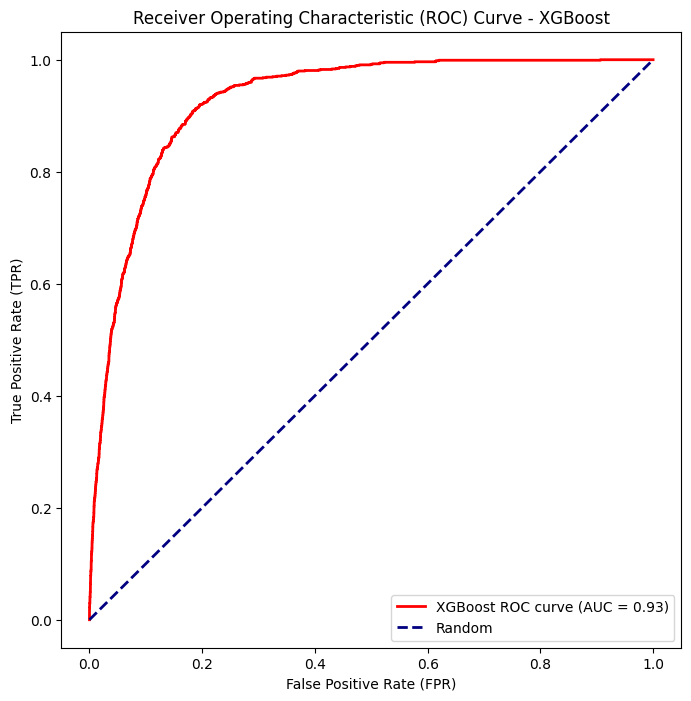

In [ ]:
# Plotting the ROC curve for XGBoost

xgbROC = xgbModel.predict_proba(X_test_fs)[:, 1]

xgbFPR, xgbTPR, xgbThreshold = roc_curve(y_test, xgbROC)

xgbAUC = auc(xgbFPR, xgbTPR)

plt.figure(figsize=(8, 8))
plt.plot(xgbFPR, xgbTPR, color='red', lw=2, label=f'XGBoost ROC curve (AUC = {xgbAUC:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost')
plt.legend()
plt.show()


### **Comparative Analysis**

In [ ]:
# Constructing a new dataframe and transposing it
Model_comparisons = pd.DataFrame(model_comparison).T

# Naming the columns appropriately
Model_comparisons.columns = ['Model Accuracy','Model F1-Score', 'Precision', 'Recall']

# Sorting the dataframe based on the F1-Scores
Model_comparisons = Model_comparisons.sort_values(by='Model F1-Score',ascending=False)

# Formating for better visualization
Model_comparisons.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,Precision,Recall
XGBoost,90.36%,90.48%,60.64%,57.20%
Random Forest,89.28%,89.35%,55.75%,54.17%
Decision Tree,86.39%,85.54%,45.26%,61.23%
Logistic Regression,84.41%,82.45%,42.47%,82.49%


In [ ]:
# Highlighting the highest performance score in each column

Model_comparisons.style.highlight_max().format("{:.2%}")

,Model Accuracy,Model F1-Score,Precision,Recall
XGBoost,90.36%,90.48%,60.64%,57.20%
Random Forest,89.28%,89.35%,55.75%,54.17%
Decision Tree,86.39%,85.54%,45.26%,61.23%
Logistic Regression,84.41%,82.45%,42.47%,82.49%


In [ ]:
# Highlighting the lowest performance score in each column

Model_comparisons.style.highlight_min().format("{:.2%}")

,Model Accuracy,Model F1-Score,Precision,Recall
XGBoost,90.36%,90.48%,60.64%,57.20%
Random Forest,89.28%,89.35%,55.75%,54.17%
Decision Tree,86.39%,85.54%,45.26%,61.23%
Logistic Regression,84.41%,82.45%,42.47%,82.49%


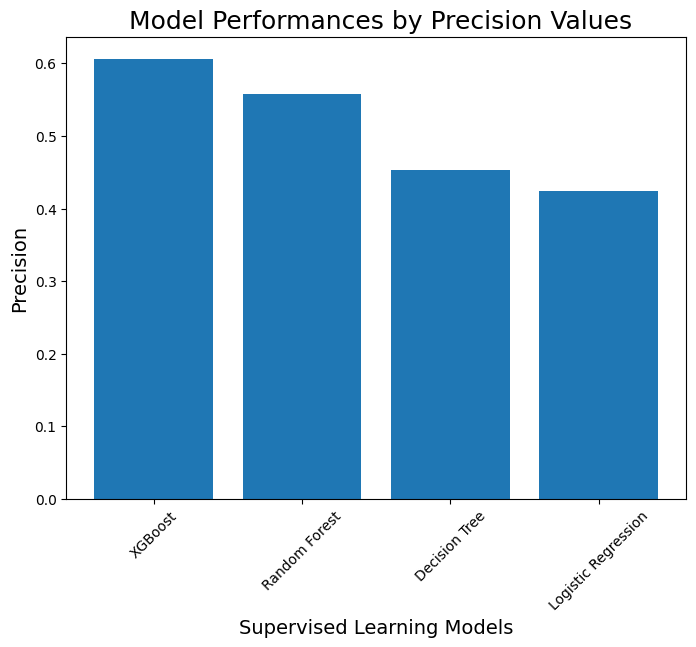

In [ ]:
# Visualizing the performance of each model based on Precision Scores

plt.figure(figsize=(8, 6))

models = list(Model_comparisons.index)
precision_scores = list(Model_comparisons['Precision'])

plt.bar(models, precision_scores)
plt.title(" Model Performances by Precision Values", fontsize=18)
plt.xlabel("Supervised Learning Models", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.xticks(rotation=45)

plt.show()

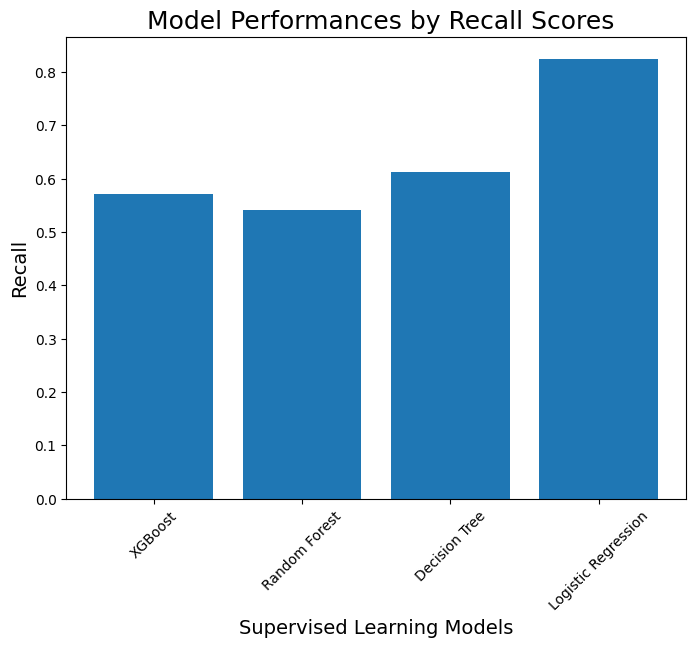

In [ ]:
# Visualizing the performance of each model based on Recall Scores

plt.figure(figsize=(8, 6))

models = list(Model_comparisons.index)
recall_scores = list(Model_comparisons['Recall'])

plt.bar(models, recall_scores)
plt.title(" Model Performances by Recall Scores", fontsize=18)
plt.xlabel("Supervised Learning Models", fontsize=14)
plt.ylabel("Recall", fontsize=14)
plt.xticks(rotation=45)

plt.show()

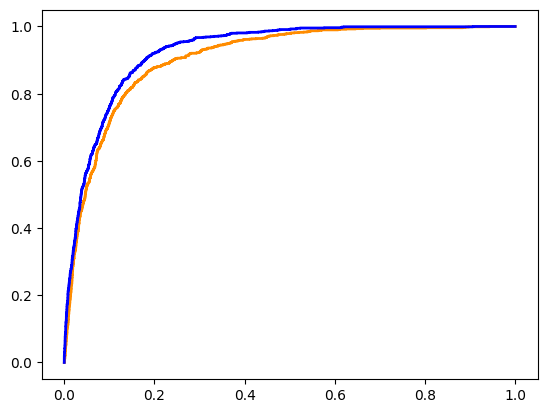

In [ ]:
# Comparing ROC Curves of Logistic Regression and XGB Boost Models

plt.plot(logFPR, logTPR, color='darkorange', lw=2, label='Logistic Regression ROC curve (AUC = {:.2f})'.format(logAUC))
plt.plot(xgbFPR, xgbTPR, color='blue', lw=2, label='XG Boost ROC curve (AUC = {:.2f})'.format(xgbAUC))
